# Diagnostics from the log files

In [12]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import numpy as np
import x4c
import matplotlib.pyplot as plt
print(x4c.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024.4.16


In [13]:
casename = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'

L = {}
L['3xCO2'] = x4c.Logs(
    f'/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/archive/{casename}/logs',
    comp='ocn',
    # load_num=-10,  # the last n files
)

casename = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.1.5xCO2.005'
L['1.5xCO2'] = x4c.Logs(
    f'/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/archive/{casename}/logs',
    comp='ocn',
    # load_num=-10,  # the last n files
)

casename = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.PI.tuning.110'
L['PI'] = x4c.Logs(
    f'/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/archive/{casename}/logs',
    comp='ocn',
    # load_num=-10,  # the last n files
)

>>> Logs.dirpath: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/archive/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005/logs
>>> 351 Logs.paths:
Start: ocn.log.2682906.desched1.231221-232436.gz
End: ocn.log.4100121.desched1.240412-113541.gz
>>> Logs.dirpath: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/archive/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.1.5xCO2.005/logs
>>> 120 Logs.paths:
Start: ocn.log.3770172.desched1.240309-201624.gz
End: ocn.log.4181436.desched1.240418-232117.gz
>>> Logs.dirpath: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/archive/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.PI.tuning.110/logs
>>> 49 Logs.paths:
Start: ocn.log.3925680.desched1.240327-145303.gz
End: ocn.log.4116831.desched1.240414-093039.gz


In [14]:
for k, v in L.items():
    v.get_vars('TEMP')

In [15]:
dT = {}
for k, v in L.items():
    if k != 'PI':
        dT[k] = L[k].df_ann['TEMP'].values[-1] - L['PI'].df_ann['TEMP'].values[-1]

In [16]:
case = {}

dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
case['3xCO2'] = x4c.Timeseries(dirpath)

dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.1.5xCO2.005'
case['1.5xCO2'] = x4c.Timeseries(dirpath)

dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.PI.tuning.110'
case['PI'] = x4c.Timeseries(dirpath)

>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16', 'lnd': 'ne16', 'rof': 'ne16', 'ocn': 'g16', 'ice': 'g16'}
>>> case.vars_info created
>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.1.5xCO2.005
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16', 'lnd': 'ne16', 'rof': 'ne16', 'ocn': 'g16', 'ice': 'g16'}
>>> case.vars_info created
>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.PI.tuning.110
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16', 'lnd': 'ne16', 'rof': 'ne16', 'ocn': 'g16', 'ice': '

In [26]:
gmst = {}
for k, v in case.items():
    v.calc('ts:GMST:ann', load_idx=-1)
    gmst[k] = np.atleast_1d(v.diags['ts:GMST:ann'].mean('time'))[0]
    print(k, gmst[k])

dGMST = {}
for k, v in gmst.items():
    if k != 'PI':
        dGMST[k] = gmst[k] - gmst['PI']

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.diags["ts:GMST:ann"] created
3xCO2 24.291184689859584
>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.diags["ts:GMST:ann"] created
1.5xCO2 20.367479046876184
>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.diags["ts:GMST:ann"] created
PI 15.148048207480398


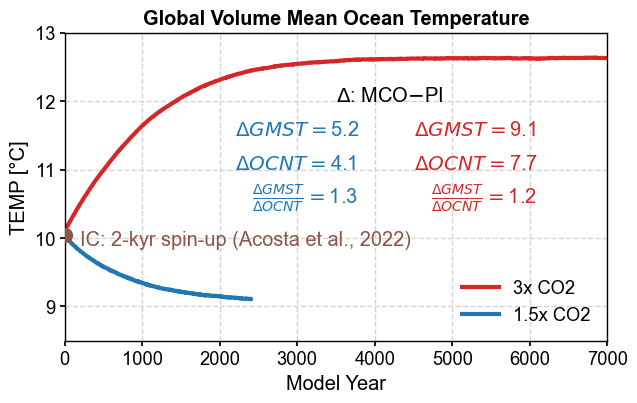

Figure saved at: "figs/ocn_temp_spin-up.pdf"


In [18]:
x4c.set_style('journal_spines', font_scale=1.2)
fig, ax = plt.subplots(figsize=[7, 4])
lw = 3
ax.plot(L['3xCO2'].df_ann.index, L['3xCO2'].df_ann['TEMP'], label='3x CO2', color='tab:red', lw=lw)
ax.plot(L['1.5xCO2'].df_ann.index, L['1.5xCO2'].df_ann['TEMP'], label='1.5x CO2', color='tab:blue', lw=lw)
ax.set_xlim([0, 7000])
ax.set_ylim([8.5, 13])
ax.set_ylabel('TEMP [°C]')
ax.set_xlabel('Model Year')
ax.set_title('Global Volume Mean Ocean Temperature', weight='bold')

ax.text(3500, 12., r'$\Delta$: MCO$-$PI', color='k')
ax.text(4500, 11.5, r'$\Delta GMST = $'+f'{dGMST["3xCO2"]:.1f}', color='tab:red')
ax.text(4500, 11, r'$\Delta OCNT = $'+f'{dT["3xCO2"]:.1f}', color='tab:red')
ax.text(4720, 10.5, r'$\frac{\Delta GMST}{\Delta OCNT} = $'+f'{dGMST["3xCO2"]/dT["3xCO2"]:.1f}', color='tab:red')
ax.text(2200, 11.5, r'$\Delta GMST = $'+f'{dGMST["1.5xCO2"]:.1f}', color='tab:blue')
ax.text(2200, 11, r'$\Delta OCNT = $'+f'{dT["1.5xCO2"]:.1f}', color='tab:blue')
ax.text(2420, 10.5, r'$\frac{\Delta GMST}{\Delta OCNT} = $'+f'{dGMST["1.5xCO2"]/dT["1.5xCO2"]:.1f}', color='tab:blue')
ax.text(200, 9.9, r'IC: 2-kyr spin-up (Acosta et al., 2022)', color='tab:brown')
ax.scatter(0, 10.05, s=100, marker='o', color='tab:brown', zorder=99)

# ax.text(4500, 11.5, r'$\Delta T_{GMST} = $'+f'{dGMST["3xCO2"]:.1f}', color='tab:red')
# ax.text(4620, 11, r'$\Delta T_{OCN} = $'+f'{dT["3xCO2"]:.1f}', color='tab:red')
# ax.text(4720, 10.5, r'$\frac{\Delta T_{GMST}}{\Delta T_{OCN}} = $'+f'{dGMST["3xCO2"]/dT["3xCO2"]:.1f}', color='tab:red')

# ax.text(2000, 11.5, r'$\Delta T_{GMST} = $'+f'{dGMST["1.5xCO2"]:.1f}', color='tab:blue')
# ax.text(2120, 11, r'$\Delta T_{OCN} = $'+f'{dT["1.5xCO2"]:.1f}', color='tab:blue')
# ax.text(2220, 10.5, r'$\frac{\Delta T_{GMST}}{\Delta T_{OCN}} = $'+f'{dGMST["1.5xCO2"]/dT["1.5xCO2"]:.1f}', color='tab:blue')

ax.legend(ncol=1, loc='lower right')
x4c.showfig(fig)
x4c.savefig(fig, './figs/ocn_temp_spin-up.pdf')

## GMST vs CO2

In [27]:
import xarray as xr
fpath = '/glade/work/fengzhu/Projects/MioMIP1/MioMIP1.nc'
MioMIP1=xr.open_dataset(fpath,decode_times=False)


ds_PA = xr.load_dataset('/glade/campaign/univ/ubrn0018/data/climo/B.MMIOx2_C5_840_WISOon.cam.h0.2100-2199.climo.nc')
tas_PA = ds_PA['TS'].x.annualize() - 273.15

wgts = np.cos(np.deg2rad(tas_PA.lat))
gmst['PA'] = tas_PA.weighted(wgts).mean(('lon', 'lat')).data.item()
gmst['PA']

23.077908400031777

In [28]:
MioMIP1.exp.data

array(['COSMOS Late Miocene 278ppm', 'COSMOS Late Miocene 450ppm',
       'COSMOS Late Miocene ICEQ 278ppm',
       'COSMOS Late Miocene ICEQ 450ppm', 'HadCM3L Late Miocene 280ppm',
       'HadCM3L Late Miocene 400ppm', 'HadCM3L Tortonian 400ppm',
       'HadCM3L Messinian 400ppm', 'NorESM-L 10Ma 350ppm',
       'NorESM-L 10Ma 560ppm', 'CCSM-NH3 355ppm', 'CCSM-NH3 560ppm',
       'CCSM3 T42 MMCO 400ppm', 'CCSM3 T42 MMCO 200ppm',
       'CCSM3 T42 MMG 200ppm', 'CCSM3 T42 MMG 400ppm', 'CCSM4 400ppm',
       'CESM1 400ppm', 'COSMOS Mid Miocene 278ppm',
       'COSMOS Mid Miocene 450ppm', 'HadCM3L Mid Miocene 90SLE 280ppm',
       'HadCM3L Mid Miocene 90SLE 400ppm',
       'HadCM3L Mid Miocene 90SLE 560ppm',
       'HadCM3L Mid Miocene 90SLE 850ppm',
       'HadCM3L Mid Miocene 55SLE 280ppm',
       'HadCM3L Mid Miocene 55SLE 400ppm',
       'HadCM3L Mid Miocene 55SLE 560ppm',
       'HadCM3L Mid Miocene 55SLE 850ppm',
       'HadCM3L Mid Miocene NoICE 280ppm',
       'HadCM3L Mid Miocene 

In [29]:
co2base = 284.7

exp = {
    'iCESM1.3 Mid Miocene': {
        'CO2': np.array([1.5, 3]),
        'GMST': np.array([
            gmst['1.5xCO2'],
            gmst['3xCO2'],
        ])
    },
    'Acosta et al. (2022) Mid Miocene': {'CO2': np.array([840])/co2base, 'GMST': np.array([gmst['PA']])},
}

for name in MioMIP1.exp.data:
    # print(name.split('ppm')[0].split())
    exp_name = ' '.join(name.split('ppm')[0].split()[:-1])
    co2ppm = float(name.split('ppm')[0].split()[-1]) / co2base
    gmst = MioMIP1.TS_GM.sel(exp=name).data.item()-273.15
    if exp_name not in exp:
        exp[exp_name] = {}
        exp[exp_name]['CO2'] = [co2ppm]
        exp[exp_name]['GMST'] = [gmst]
    else:
        exp[exp_name]['CO2'].append(co2ppm)
        exp[exp_name]['GMST'].append(gmst)

for name in MioMIP1.exp.data:
    exp[exp_name]['CO2'] = np.array(exp[exp_name]['CO2'])
    exp[exp_name]['GMST'] = np.array(exp[exp_name]['GMST'])

/glade/derecho/scratch/fengzhu/tmp/ipykernel_1798/3191291133.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)


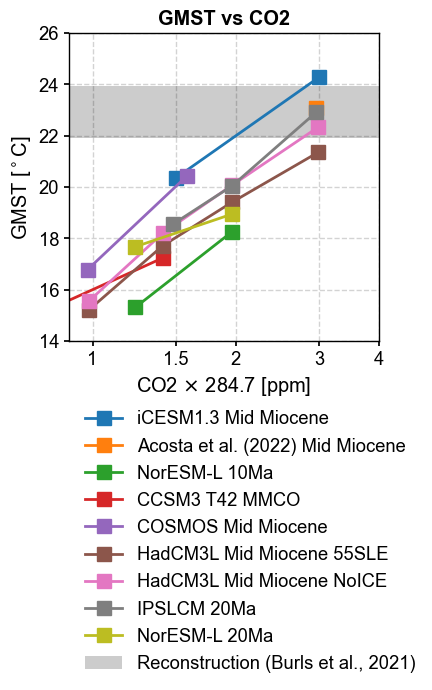

Figure saved at: "figs/GMSTvsCO2.pdf"


In [30]:
exp_names = [
    'iCESM1.3 Mid Miocene',
    'Acosta et al. (2022) Mid Miocene',
    # 'COSMOS Late Miocene',
    # 'COSMOS Late Miocene ICEQ',
    # 'HadCM3L Late Miocene',
    # 'HadCM3L Tortonian',
    # 'HadCM3L Messinian',
    'NorESM-L 10Ma',
    # 'CCSM-NH3',
    'CCSM3 T42 MMCO',
    # 'CCSM3 T42 MMG',
    # 'CCSM4',
    # 'CESM1',
    'COSMOS Mid Miocene',
    # 'HadCM3L Mid Miocene 90SLE',
    'HadCM3L Mid Miocene 55SLE',
    'HadCM3L Mid Miocene NoICE',
    # 'HadCM3L Langhian',
    'IPSLCM 20Ma',
    # 'IPSLCM 20Ma NoGIS',
    'NorESM-L 20Ma',
]

data_dict = {k: exp[k] for k in exp_names}
fig, ax = plt.subplots(figsize=(4, 4))

ylim=[14, 26]
xlim = [0, 4]
xticks=[1, 1.5, 2, 3, 4]
xlabel=r'CO2 $\times$ 284.7 [ppm]'
ylabel=r'GMST [$^\circ$C]'

ax.set_xscale('log')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('GMST vs CO2', weight='bold')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

for k, v in data_dict.items():
    ax.plot(v['CO2'], v['GMST'], label=k, ms=10, marker='s')

_lgd_kws = {
    'frameon': False,
    'bbox_to_anchor': (1, 1),
    'loc': 'upper left',
    'ncol': 1,
}
ax.legend(**_lgd_kws)


mcomioallGMST=22.9262
mcomioallGMST_1SDT=1.0077

ax.fill_between(
    np.arange(0, 7, 1),
    mcomioallGMST-mcomioallGMST_1SDT,
    mcomioallGMST+mcomioallGMST_1SDT,
    facecolor='k', alpha=0.2,
    label='Reconstruction (Burls et al., 2021)',
)
ax.legend(bbox_to_anchor=(0, -1.13), loc='lower left')
x4c.showfig(fig)
x4c.savefig(fig, './figs/GMSTvsCO2.pdf')